<h2><b>EDA</b> PCOS Habitos</h2>

En esta sección se realiza un Análisis Exploratorio de Datos (EDA) centrado en los hábitos de vida y su posible relación con la presencia del Síndrome de Ovario Poliquístico (PCOS). Este análisis busca identificar patrones, tendencias y diferencias entre mujeres con y sin PCOS a partir de variables relacionadas con el estilo de vida.

Los parámetros considerados son los siguientes:

Sleep_Hours: cantidad promedio de horas de sueño por noche, factor clave en la regulación metabólica y hormonal.

Stress_Level: nivel de estrés percibido, asociado con alteraciones hormonales y posibles efectos sobre el ciclo menstrual.

Smoking: consumo de tabaco, hábito que puede agravar la resistencia a la insulina y el riesgo cardiovascular en mujeres con PCOS.

PCOS_Medication: uso de medicación específica para tratar el síndrome, indicador indirecto de diagnóstico y tratamiento.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/pcos_habitos.csv')
df

,PCOS,Sleep_Hours,Stress_Level,Smoking,PCOS_Medication
0,0.0,0-6,0,0,0
1,0.0,7-8,0,0,0
2,0.0,7-8,1,0,0
3,0.0,7-8,1,0,0
4,0.0,7-8,1,0,0
...,...,...,...,...,...
168,0.0,7-8,0,0,0
169,1.0,7-8,1,0,0
170,1.0,7-8,0,0,0
171,0.0,0-6,1,0,0


In [4]:
#Análisis de las variables binarias
bin_cols = ["Stress_Level", "Smoking", "PCOS_Medication"]

for col in bin_cols:
    con = df[df[col] == 1]
    sin = df[df[col] == 0]
    
    pcos_con = con["PCOS"].mean() * 100
    pcos_sin = sin["PCOS"].mean() * 100

#2f: muestra dos decimales
    print(f"{col}:")
    print(f" % con PCOS entre quienes SÍ tienen {col}: {pcos_con:.2f}%")
    print(f" % con PCOS entre quienes NO tienen {col}: {pcos_sin:.2f}%")
    print(f" Diferencia: {(pcos_con - pcos_sin):.2f}%\n")

Stress_Level:
 % con PCOS entre quienes SÍ tienen Stress_Level: 29.20%
 % con PCOS entre quienes NO tienen Stress_Level: 8.47%
 Diferencia: 20.73%

Smoking:
 % con PCOS entre quienes SÍ tienen Smoking: 50.00%
 % con PCOS entre quienes NO tienen Smoking: 21.76%
 Diferencia: 28.24%

PCOS_Medication:
 % con PCOS entre quienes SÍ tienen PCOS_Medication: 85.71%
 % con PCOS entre quienes NO tienen PCOS_Medication: 19.39%
 Diferencia: 66.32%



In [5]:
bin_cols = ["Stress_Level", "Smoking", "PCOS_Medication"]

# Calculamos los porcentajes
resultados = {}

for col in bin_cols:
    con = df[df[col] == 1]
    sin = df[df[col] == 0]
    
    pcos_con = con["PCOS"].mean() * 100
    pcos_sin = sin["PCOS"].mean() * 100
    
    resultados[col] = [pcos_con, pcos_sin]

# Convertimos a DataFrame para graficar más fácil
#T. para invertir la tabla
res_df = pd.DataFrame(resultados, index=["Sí", "No"]).T

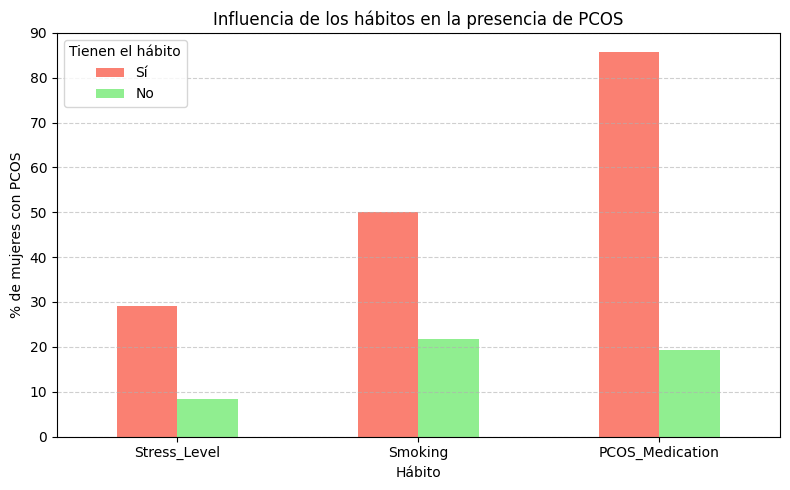

In [6]:
# Creamos el gráfico
res_df.plot(kind="bar", figsize=(8,5), color=['salmon', 'lightgreen'])

plt.title("Influencia de los hábitos en la presencia de PCOS")
plt.xlabel("Hábito")
plt.ylabel("% de mujeres con PCOS")
plt.xticks(rotation=0)
plt.legend(title="Tienen el hábito")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [7]:
# --- Agrupar por horas de sueño ---
sleep_stats = df.groupby("Sleep_Hours")["PCOS"].mean() * 100

# Convertimos en DataFrame
sleep_df = sleep_stats.reset_index()
sleep_df.columns = ["Sleep_Hours", "% con PCOS"]

# Orden lógico de horas de sueño
orden_sueno = ["0-6", "7-8", "9-11", "12"]

# Reordenamos el DataFrame según ese orden
sleep_df["Sleep_Hours"] = pd.Categorical(sleep_df["Sleep_Hours"], categories=orden_sueno, ordered=True)
sleep_df = sleep_df.sort_values("Sleep_Hours")

# --- Mostrar tabla ---
print("Porcentaje de mujeres con PCOS según horas de sueño:")
print(sleep_df.to_string(index=False))

Porcentaje de mujeres con PCOS según horas de sueño:
Sleep_Hours  % con PCOS
        0-6   27.659574
        7-8   19.090909
       9-11   28.571429
         12    0.000000


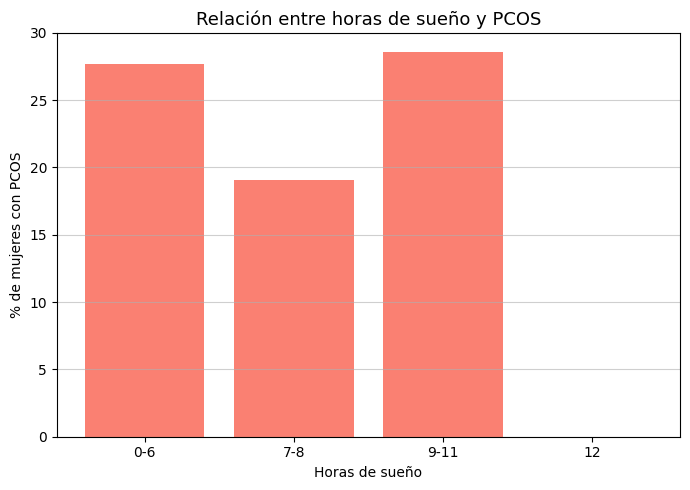

In [8]:
# --- Gráfico ---
plt.figure(figsize=(7,5))
plt.bar(sleep_df["Sleep_Hours"], sleep_df["% con PCOS"], color="salmon")
plt.title("Relación entre horas de sueño y PCOS", fontsize=13)
plt.xlabel("Horas de sueño")
plt.ylabel("% de mujeres con PCOS")
plt.grid(axis="y", linestyle="-", alpha=0.6)
plt.tight_layout()
plt.show()

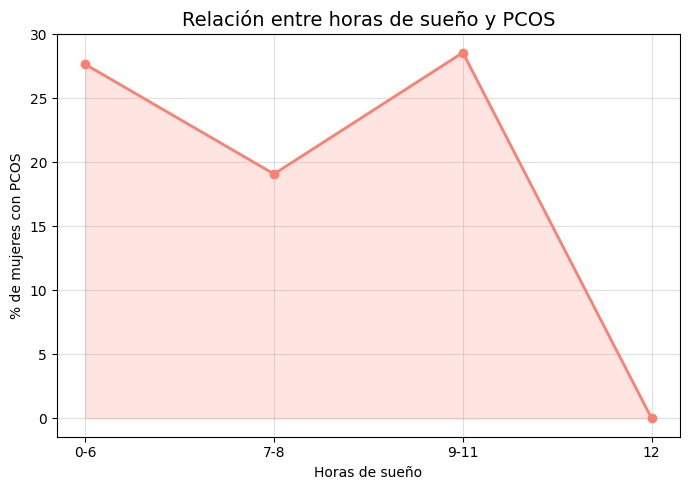

In [9]:
plt.figure(figsize=(7,5))
plt.plot(
    sleep_df["Sleep_Hours"],
    sleep_df["% con PCOS"],
    marker="o",
    color="salmon",
    linewidth=2
)
plt.fill_between(
    sleep_df["Sleep_Hours"],
    sleep_df["% con PCOS"],
    color="salmon",
    alpha=0.2
)
plt.title("Relación entre horas de sueño y PCOS", fontsize=14)
plt.xlabel("Horas de sueño")
plt.ylabel("% de mujeres con PCOS")
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

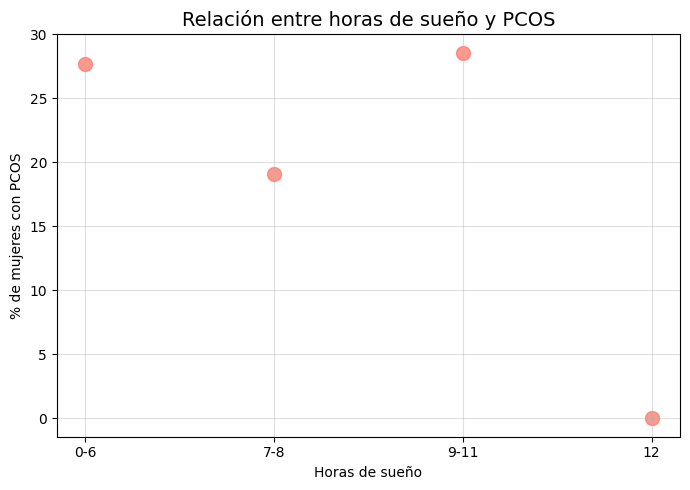

In [11]:
plt.figure(figsize=(7,5))
plt.scatter(
    sleep_df["Sleep_Hours"],
    sleep_df["% con PCOS"],
    color="salmon",
    s=100,
    alpha=0.8
)
plt.title("Relación entre horas de sueño y PCOS", fontsize=14)
plt.xlabel("Horas de sueño")
plt.ylabel("% de mujeres con PCOS")
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()